<a href="https://colab.research.google.com/github/amandebnath/Colab-Projects/blob/main/Automate_Home_Loan_Eligibility_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:

Understanding the problem statement is the first and foremost step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement -

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s).Classification can be of two types:

Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features.

Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.

Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

Although this notebook is specifically built to give you a walkthrough of Loan Prediction problem, you can always refer the content to get a comprehensive overview to solve a classification problem.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read Train and Test Data**

In [5]:
train = pd.read_csv('/content/drive/MyDrive/Data Science/home loan/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data Science/home loan/test.csv')

**Copy of original data**

In [6]:
train_original = train.copy()
test_original = test.copy()

**Understanding the data**

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

**Print the data types**

In [9]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [10]:
test.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64


**Shape of the dataset**

In [11]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**Target Variable**

In [13]:
#train["Loan_Status"].size
train["Loan_Status"].count()

np.int64(614)

In [14]:
train["Loan_Status"].value_counts()

,count
Loan_Status,
Y,422
N,192


In [15]:
# Normalize can be set to True to print proportions instead of number
train["Loan_Status"].value_counts(normalize=True)*100

,proportion
Loan_Status,
Y,68.729642
N,31.270358


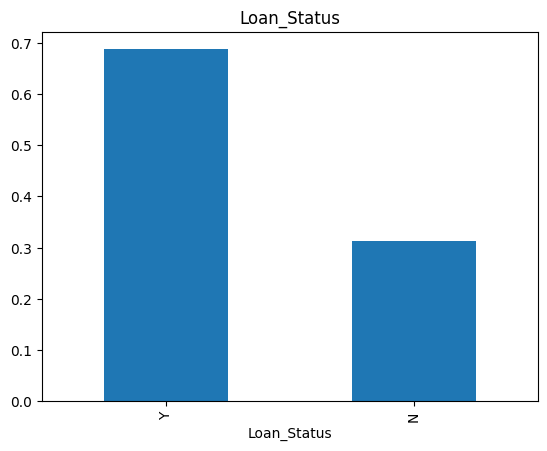

In [16]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loan_status.png')

# Independent Variable (Categorical)

**Analysis on "Gender" variable :**

In [17]:
train["Gender"].count()

np.int64(601)

In [18]:
train["Gender"].value_counts()

,count
Gender,
Male,489
Female,112


In [19]:
train['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
Male,81.364393
Female,18.635607


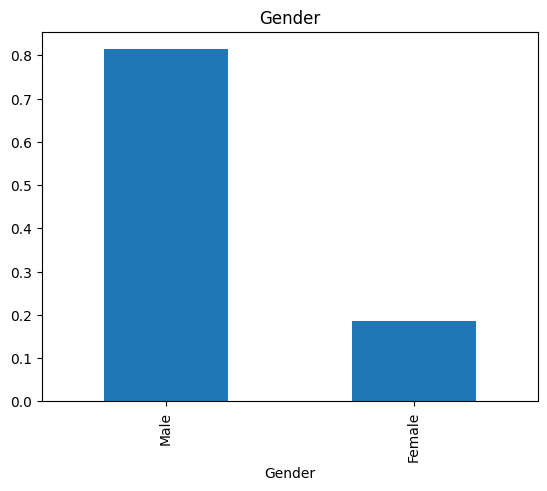

In [20]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')
plt.savefig('/content/drive/MyDrive/Data Science/home loan/gender.png')

**Analysis on "Married" variable :**

In [21]:
train["Married"].count()

np.int64(611)

In [22]:
train["Married"].value_counts()

,count
Married,
Yes,398
No,213


In [23]:
train['Married'].value_counts(normalize=True)*100

,proportion
Married,
Yes,65.139116
No,34.860884


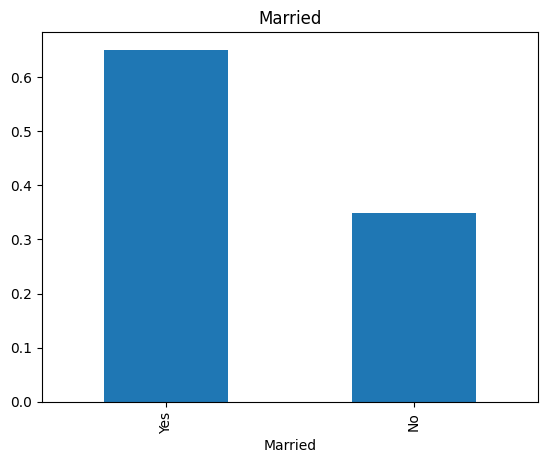

In [24]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.savefig('/content/drive/MyDrive/Data Science/home loan/married.png')

**Analysis on "Self_Employed" variable :**

In [25]:
train["Self_Employed"].count()

np.int64(582)

In [26]:
train["Self_Employed"].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [27]:
train['Self_Employed'].value_counts(normalize=True)*100

,proportion
Self_Employed,
No,85.910653
Yes,14.089347


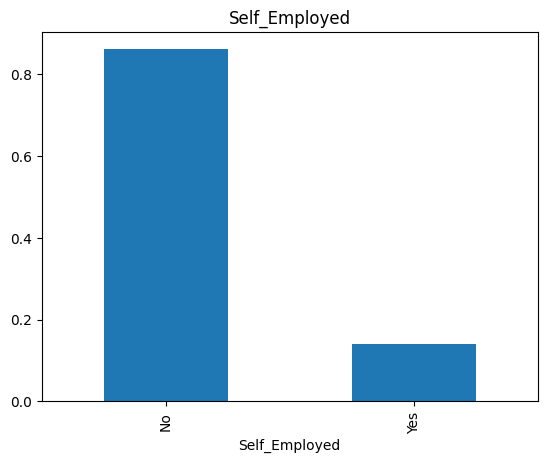

In [28]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.savefig('/content/drive/MyDrive/Data Science/home loan/self_employed.png')

**Analysis on "Credit_History" variable :**

In [29]:
train["Credit_History"].count()

np.int64(564)

In [30]:
train["Credit_History"].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [31]:
train['Credit_History'].value_counts(normalize=True)*100

,proportion
Credit_History,
1.0,84.219858
0.0,15.780142


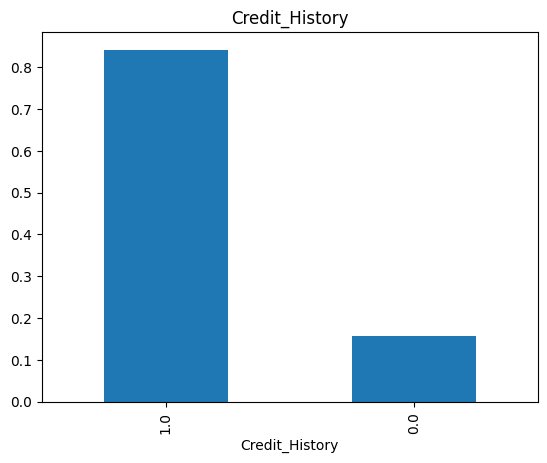

In [32]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.savefig('/content/drive/MyDrive/Data Science/home loan/credit_history.png')

# Independent Variable (Ordinal)

**Analysis on "Dependents" variable :**

In [33]:
train['Dependents'].count()

np.int64(599)

In [34]:
train["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [35]:
train['Dependents'].value_counts(normalize=True)*100

,proportion
Dependents,
0,57.595993
1,17.028381
2,16.861436
3+,8.514190


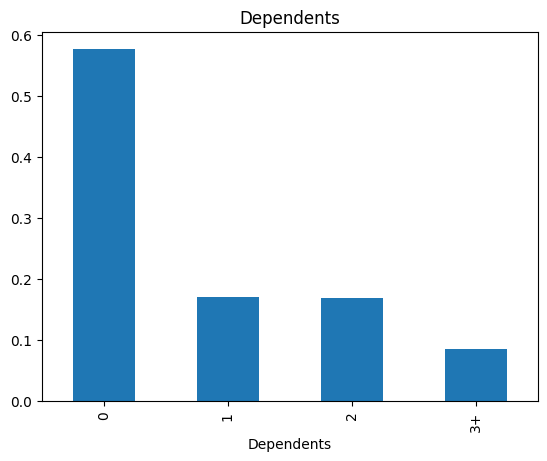

In [36]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/dependents.png')

**Analysis on "Education" variable :**

In [37]:
train["Education"].count()

np.int64(614)

In [38]:
train["Education"].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [39]:
train["Education"].value_counts(normalize=True)*100

,proportion
Education,
Graduate,78.175896
Not Graduate,21.824104


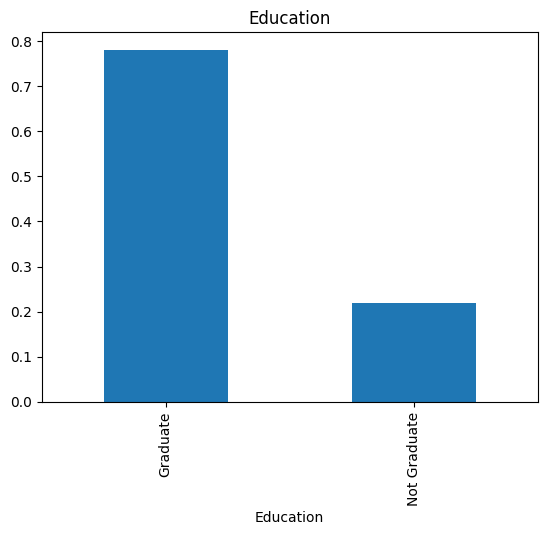

In [40]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/education.png')

**Analysis on "Property_Area" variable :**

In [41]:
train["Property_Area"].count()

np.int64(614)

In [42]:
train["Property_Area"].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [43]:
train["Property_Area"].value_counts(normalize=True)*100

,proportion
Property_Area,
Semiurban,37.947883
Urban,32.899023
Rural,29.153094


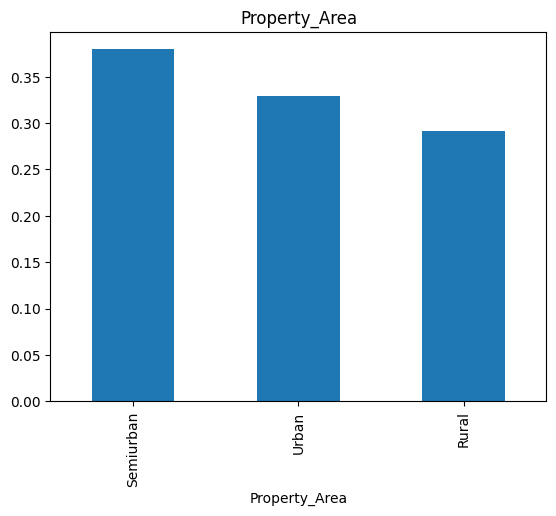

In [44]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/property_area.png')

# Independent Variable (Numerical)

**"ApplicantIncome" distribution :**

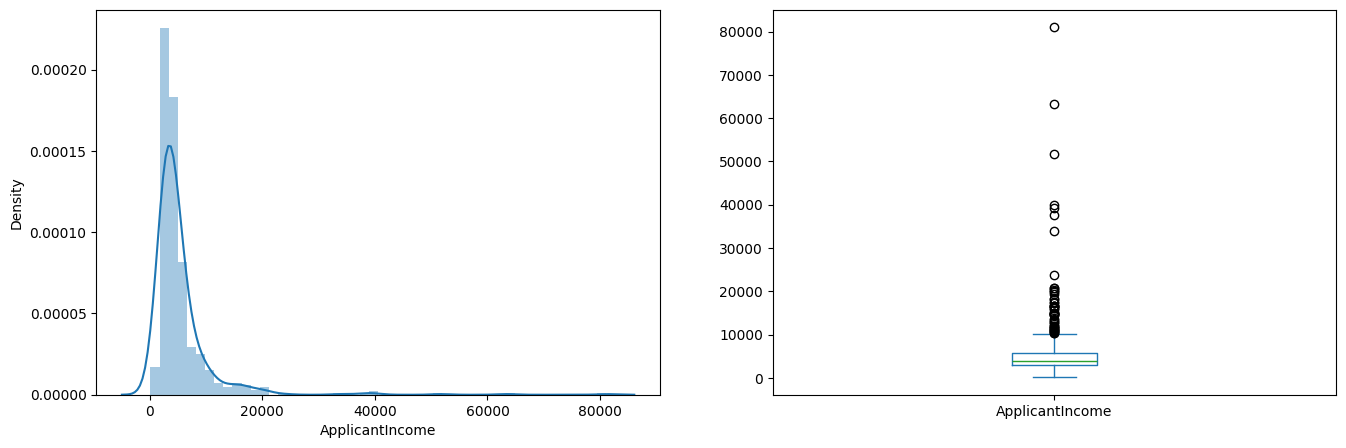

In [45]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.savefig('/content/drive/MyDrive/Data Science/home loan/applicant_income.jpeg')
plt.show()

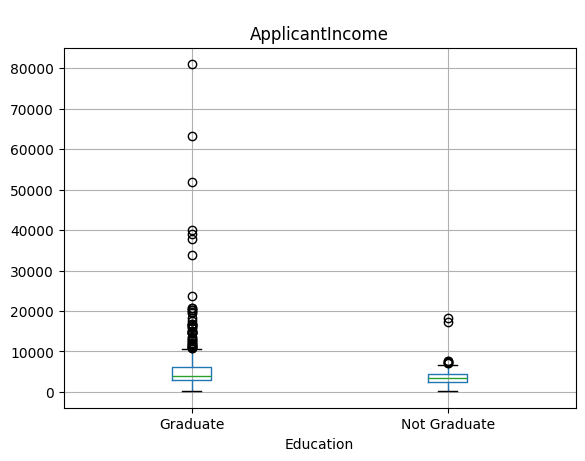

In [46]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/applicant_income_boxplt.png')
plt.show()

**Let’s look at the "CoapplicantIncome" distribution:**

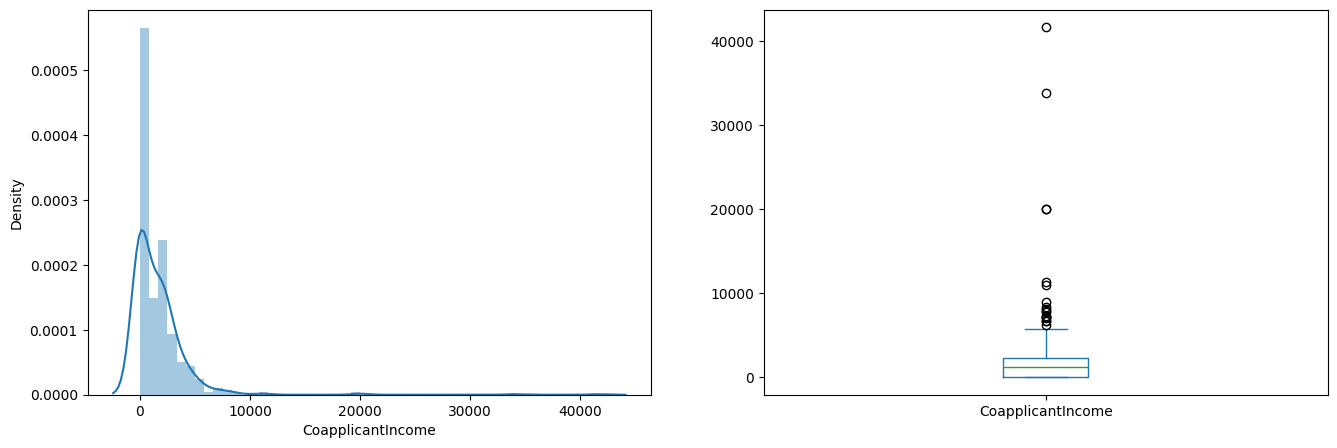

In [47]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.savefig('/content/drive/MyDrive/Data Science/home loan/coapplicantincome.png')
plt.show()

**Let’s look at the distribution of "LoanAmount" variable :**

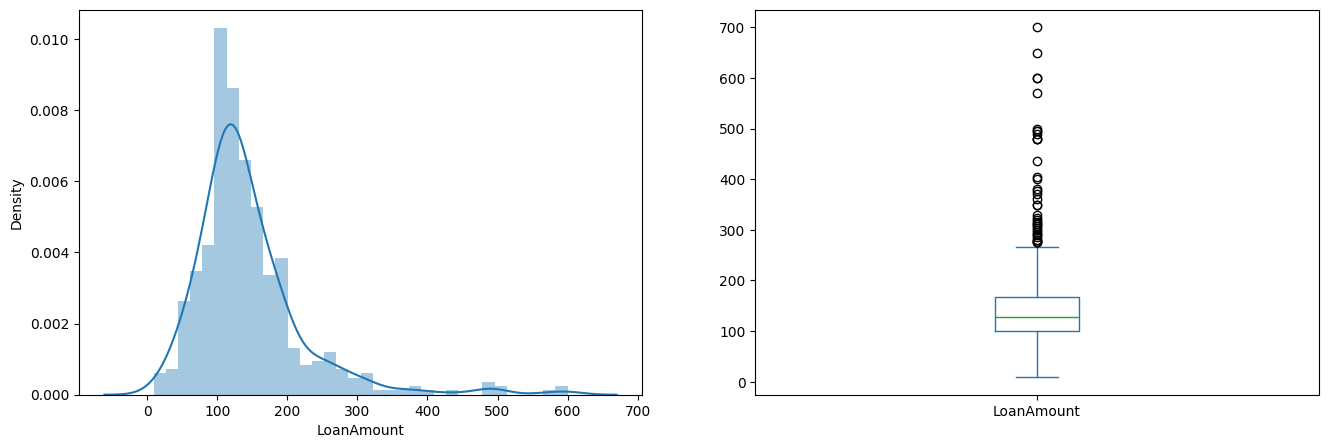

In [48]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanamount.png')
plt.show()

**distribution of "LoanAmountTerm" variable :**

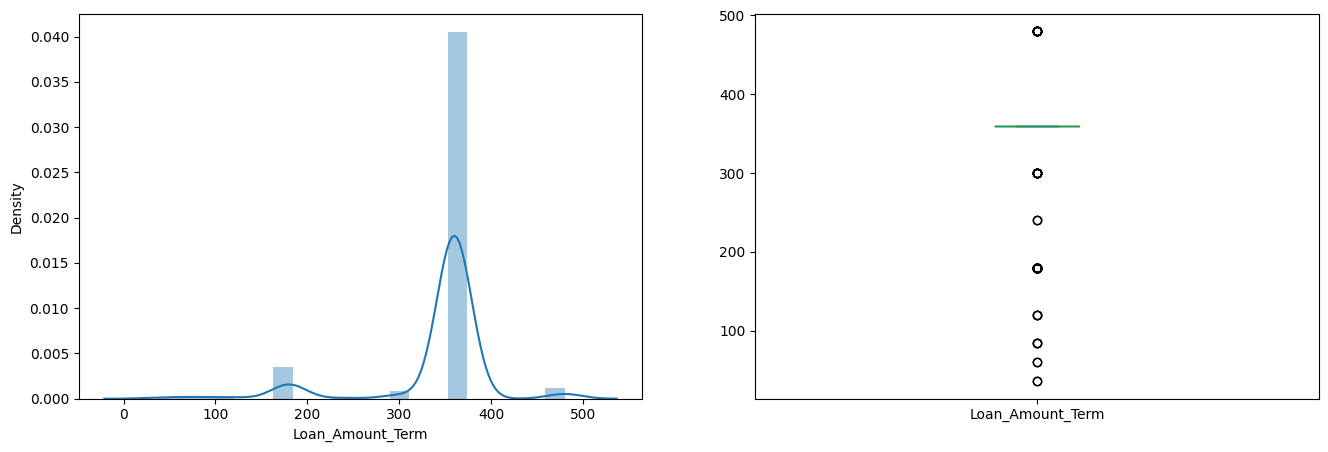

In [49]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanamntterm.png')
plt.show()

**Relation between "Loan_Status" and "Gender"**

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


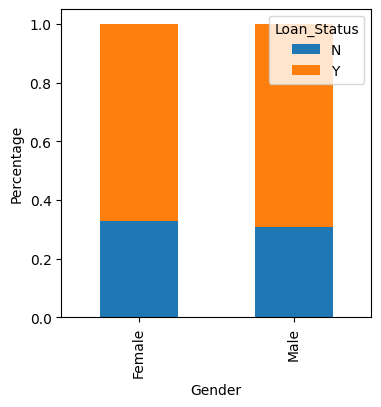

In [50]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")

plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanstatus_gen.png')
plt.show()

**Relation between "Loan_Status" and "Married"**

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


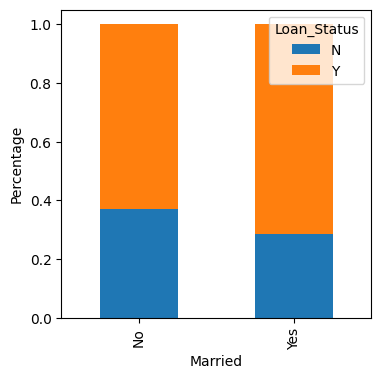

In [51]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanstatus_married.png')
plt.show()

**Relation between "Loan_Status" and "Dependents"**

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


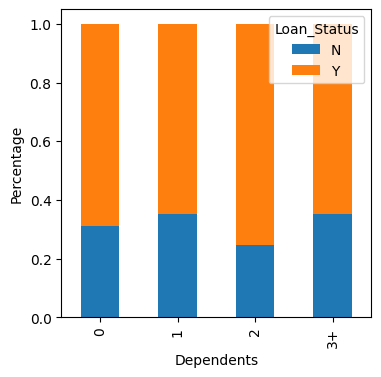

In [52]:
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanstatus_dependents.png')
plt.show()

**Relation between "Loan_Status" and "Education"**

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


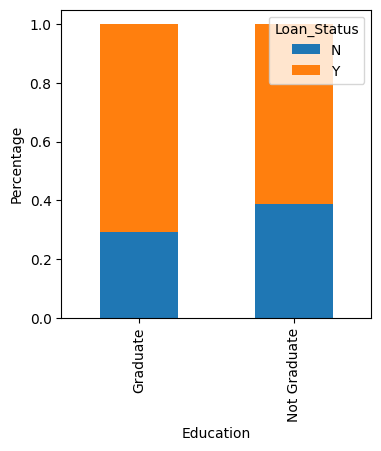

In [53]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanstatus_edu.png')
plt.show()

**Relation between "Loan_Status" and "Self_Employed"**

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


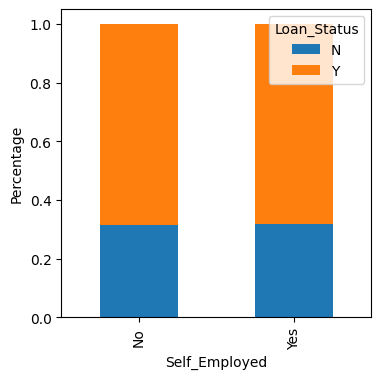

In [54]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanstatus_selfemp.png')
plt.show()

**Relation between "Loan_Status" and "Credit_History"**

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


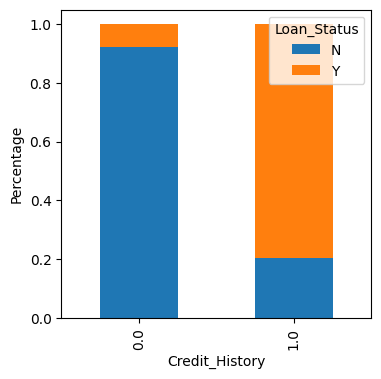

In [55]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanstatus_credithistory.png')
plt.show()

**Relation between "Loan_Status" and "Property_Area"**

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


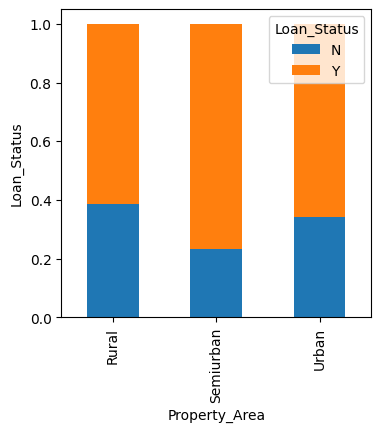

In [56]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanstatus_properyarea.png')
plt.show()

# Numerical Independent Variable vs Target Variable

**Relation between "Loan_Status" and "Income"**

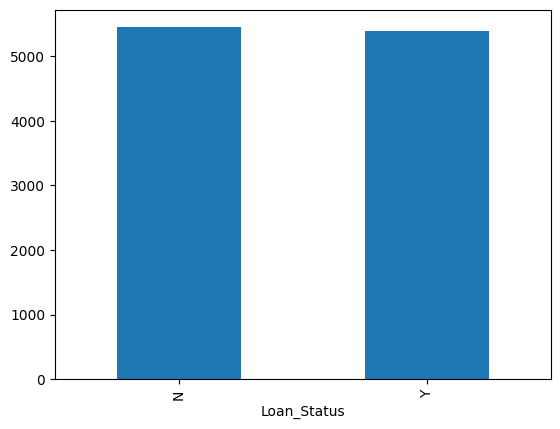

In [57]:
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanstatus_income.png')

In [58]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


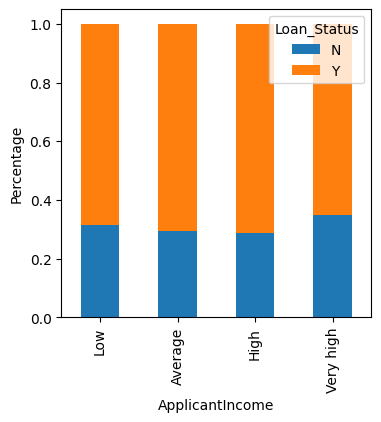

In [59]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanstatus_applicantincome.png')
plt.show()

In [60]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   15
Average                46  123
High                   24   53


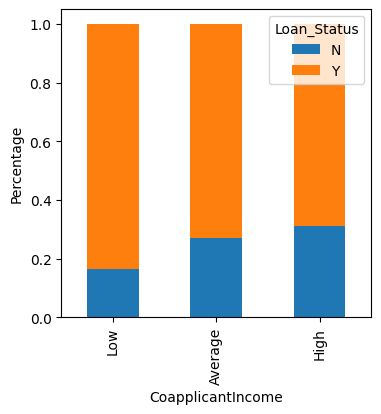

In [61]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/coappincome.png')
plt.show()

In [62]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [63]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


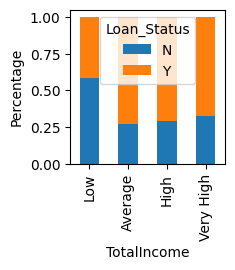

In [64]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/totalincome.png')
plt.show()

**Relation between "Loan_Status" and "Loan Amount"**

In [65]:
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


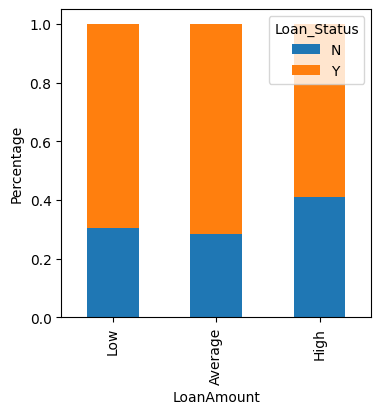

In [66]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.savefig('/content/drive/MyDrive/Data Science/home loan/loanstatus_loanamount.png')
plt.show()

**Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable**

In [67]:
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [68]:
#train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
#test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

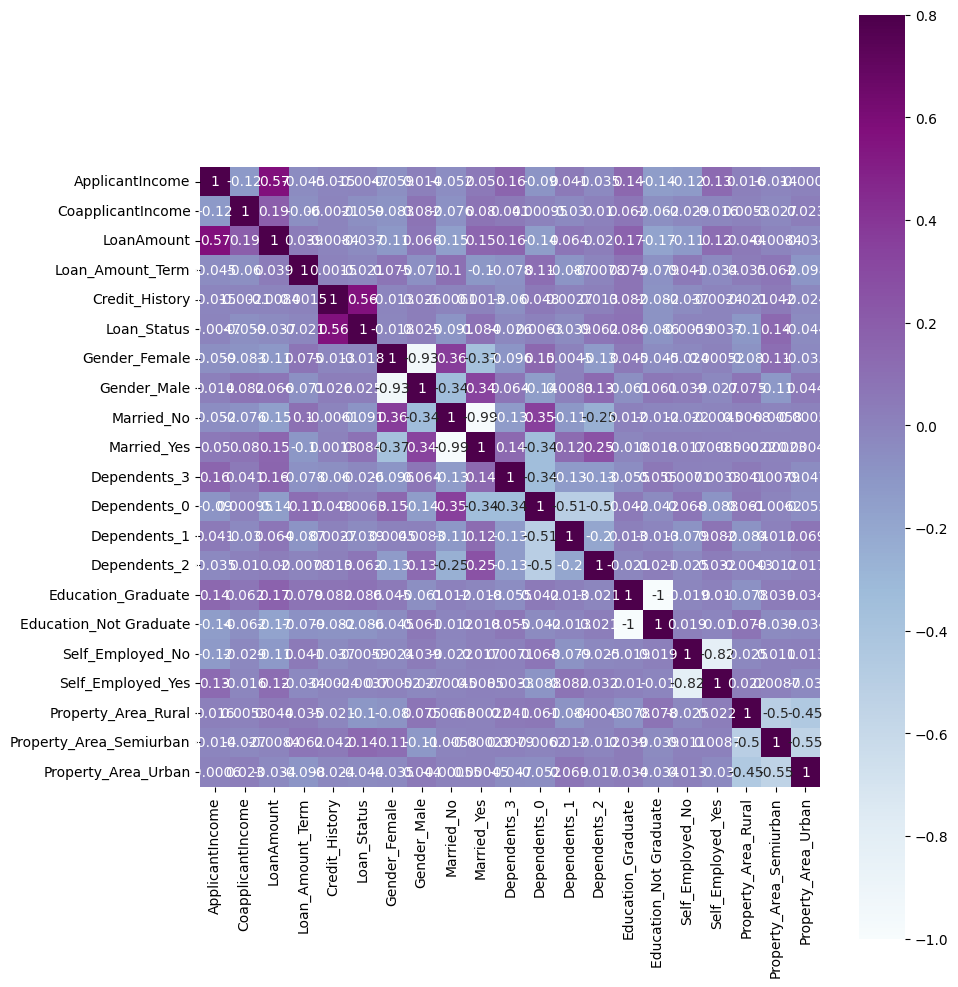

In [72]:
# Drop the 'Loan_ID' column before calculating the correlation matrix
train_numeric = train.drop('Loan_ID', axis=1)

# Convert categorical columns to numeric using one-hot encoding
train_numeric = pd.get_dummies(train_numeric)

matrix = train_numeric.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);
plt.savefig('/content/drive/MyDrive/Data Science/home loan/heatmap1.png')

**Missing value imputation**

In [70]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [73]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [74]:
train["Loan_Amount_Term"].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [75]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [76]:
train["Loan_Amount_Term"].value_counts()

,count
Loan_Amount_Term,
360.0,526
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [77]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [78]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [79]:
test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [80]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [81]:
test.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


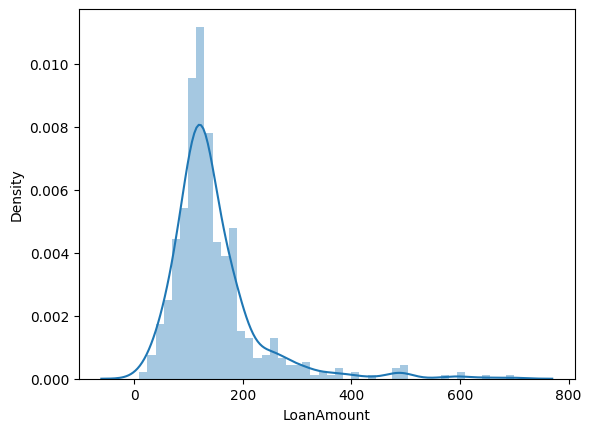

In [82]:
sns.distplot(train["LoanAmount"]);
plt.savefig('/content/drive/MyDrive/Data Science/home loan/distplot1.png')

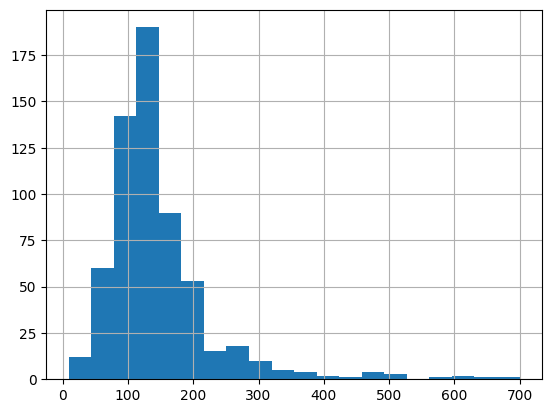

In [83]:
train['LoanAmount'].hist(bins=20)
plt.savefig('/content/drive/MyDrive/Data Science/home loan/histogram.png')

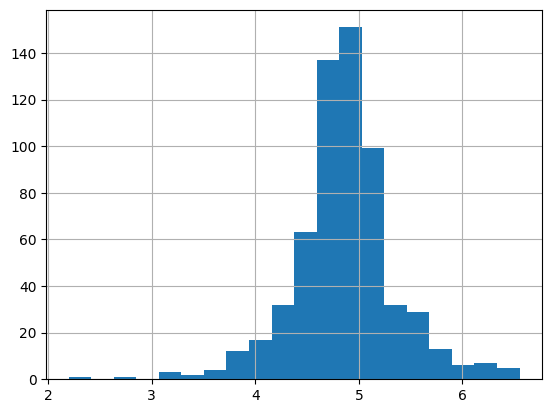

In [84]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
plt.savefig('/content/drive/MyDrive/Data Science/home loan/histogram2.png')

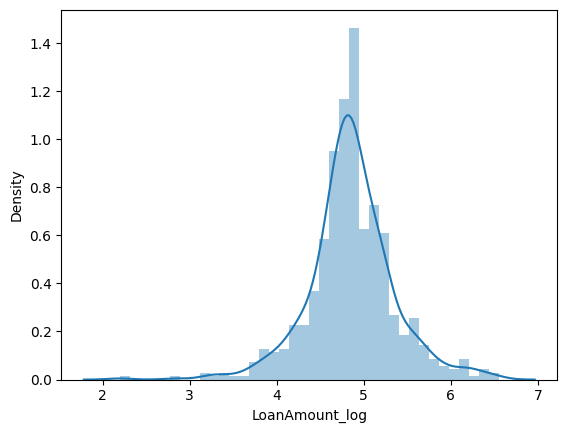

In [85]:
sns.distplot(train["LoanAmount_log"])
plt.savefig('/content/drive/MyDrive/Data Science/home loan/displot2.png')

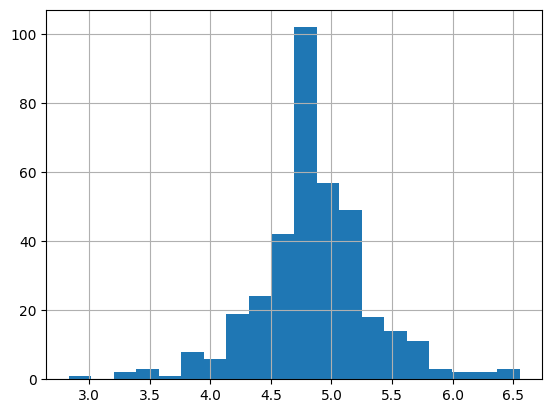

In [86]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)
plt.savefig('/content/drive/MyDrive/Data Science/home loan/histogram3.png')

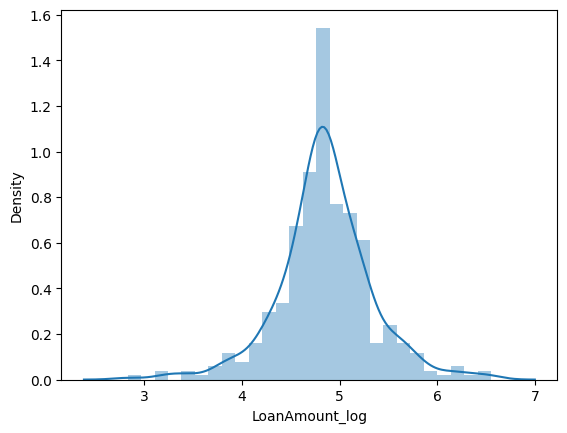

In [87]:
sns.distplot(test["LoanAmount_log"])
plt.savefig('/content/drive/MyDrive/Data Science/home loan/distplot3.png')

**Feature Engineering**

In [88]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [89]:
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


In [90]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [91]:
test[["TotalIncome"]].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


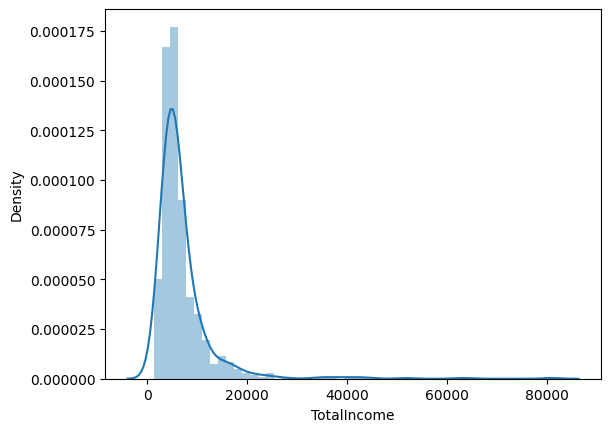

In [92]:
sns.distplot(train["TotalIncome"])
plt.savefig('/content/drive/MyDrive/Data Science/home loan/distplot4.png')

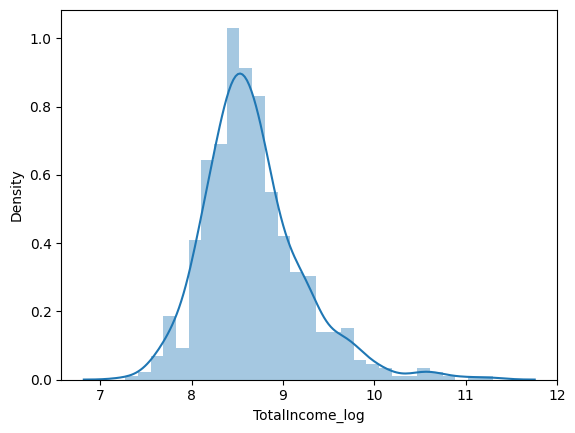

In [93]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])
plt.savefig('/content/drive/MyDrive/Data Science/home loan/distplot5.png')

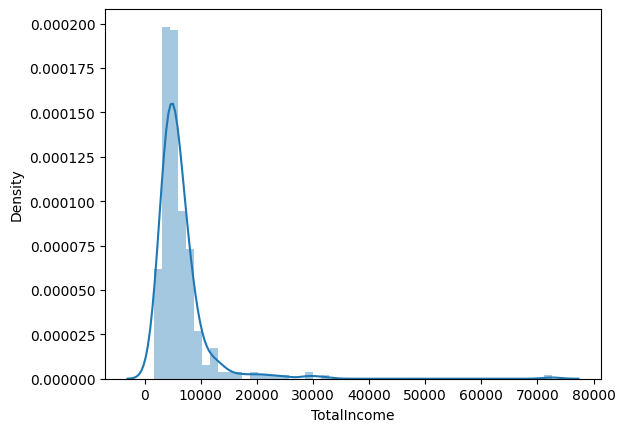

In [94]:
sns.distplot(test["TotalIncome"])
plt.savefig('/content/drive/MyDrive/Data Science/home loan/distplot6.png')

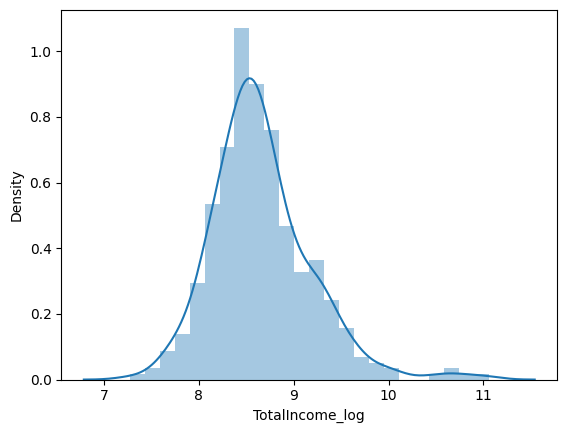

In [95]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])
plt.savefig('/content/drive/MyDrive/Data Science/home loan/distplot7.png')

In [96]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

In [97]:
train[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [98]:
test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


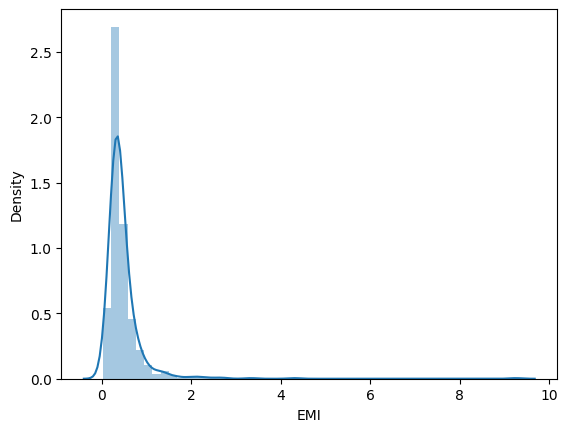

In [99]:
sns.distplot(train["EMI"])
plt.savefig('/content/drive/MyDrive/Data Science/home loan/EMI.png')

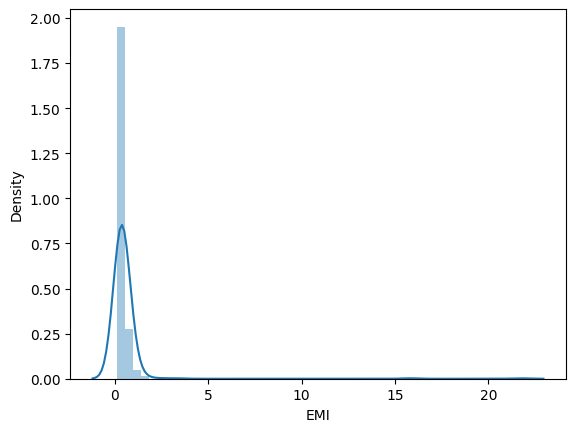

In [100]:
sns.distplot(test["EMI"])
plt.savefig('/content/drive/MyDrive/Data Science/home loan/EMI2.png')

In [101]:
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

In [102]:
train[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [103]:
test[["Balance_Income"]].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


In [104]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [105]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [106]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [107]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3275.783333


# Model Building :

In [108]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [109]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667


In [110]:
test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222


In [112]:
X=train.drop("Loan_Status",axis=1)

In [113]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,6091.0,8.714568,0.355556,5735.444444


In [114]:
y=train[["Loan_Status"]]

In [115]:
y.head(2)

,Loan_Status
0,1
1,0


In [116]:
X = pd.get_dummies(X)

In [117]:
X.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5849.0,8.674026,0.355556,5493.444444,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,False,True,False,True,...,False,True,False,True,False,True,False,True,False,False
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,False,True,False,True,...,True,False,False,True,False,False,True,False,False,True


In [118]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [119]:
train.head(3)

,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,4.852030,5849.0,8.674026,0.355556,5493.444444,False,True,True,...,True,False,False,True,False,True,False,False,False,True
1,1.0,0,4.852030,6091.0,8.714568,0.355556,5735.444444,False,True,False,...,False,True,False,True,False,True,False,True,False,False
2,1.0,1,4.189655,3000.0,8.006368,0.183333,2816.666667,False,True,False,...,True,False,False,True,False,False,True,False,False,True


In [120]:
test.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5720,8.674026,0.305556,5719.694444,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,1.0,4.852030,4576,8.714568,0.350000,4575.650000,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True
2,1.0,4.189655,6800,8.006368,0.577778,6799.422222,False,True,False,True,...,False,False,True,True,False,True,False,False,False,True


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

**Logistic Regression**

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [124]:
logistic_model = LogisticRegression(random_state=1)

In [125]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [126]:
pred_cv_logistic=logistic_model.predict(x_cv)

In [127]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100

In [128]:
score_logistic

78.91891891891892

In [129]:
pred_test_logistic = logistic_model.predict(test)

**Decision Tree**

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
tree_model = DecisionTreeClassifier(random_state=1)

In [132]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [133]:
pred_cv_tree=tree_model.predict(x_cv)

In [134]:
score_tree =accuracy_score(pred_cv_tree,y_cv)*100

In [135]:
score_tree

71.35135135135135

In [136]:
pred_test_tree = tree_model.predict(test)

**Random Forest**

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [139]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [140]:
pred_cv_forest=forest_model.predict(x_cv)

In [141]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [142]:
score_forest

77.83783783783784

**Random Forest with Grid-search**

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [145]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [146]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [149]:
grid_search.best_estimator_


RandomForestClassifier(max_depth=7, n_estimators=41, random_state=1)

In [150]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=101)

In [151]:
grid_forest_model.fit(x_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=101, random_state=1)

In [152]:
pred_grid_forest = grid_forest_model.predict(x_cv)


In [153]:
score_grid_forest = accuracy_score(pred_grid_forest,y_cv)*100


In [154]:
score_grid_forest


76.75675675675676

In [155]:
pred_grid_forest_test = grid_forest_model.predict(test)


**XGBoost**

In [156]:
from xgboost import XGBClassifier

In [157]:
xgb_model = XGBClassifier(n_estimators=50,max_depth=4)

In [158]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [159]:
pred_xgb=xgb_model.predict(x_cv)


In [160]:
score_xgb = accuracy_score(pred_xgb,y_cv)*100

In [161]:
score_xgb


77.83783783783784

**Find the important feature**

<Axes: >

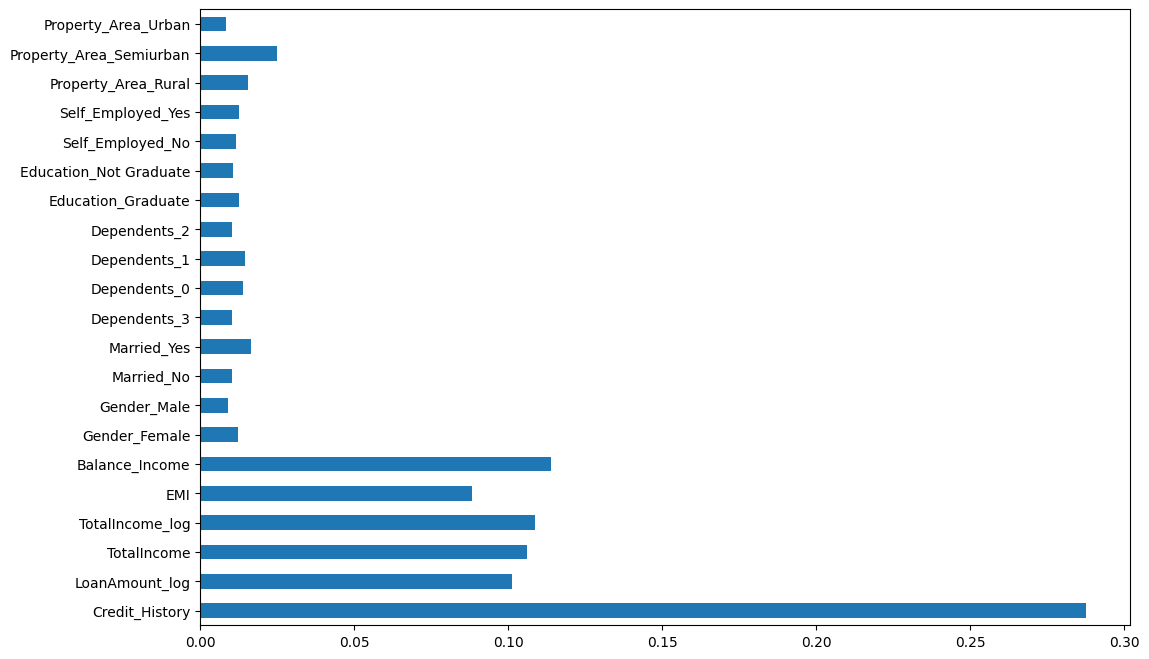

In [162]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))